In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [61]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data = pd.read_csv("/content/drive/MyDrive/data/LoanExport.csv")

<ipython-input-62-24f79c897cbc>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/data/LoanExport.csv")


In [63]:
data.head()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

In [64]:
df=pd.DataFrame(data)
df.shape

(291451, 28)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [66]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [67]:
df.describe()

CreditScore  FirstPaymentDate   MaturityDate            MIP  \
count  291451.000000     291451.000000  291451.000000  291451.000000   
mean      708.936991     199904.760553  202902.367043       9.216685   
std        68.408791         13.821228      16.090508      12.648273   
min         0.000000     199901.000000  202402.000000       0.000000   
25%       675.000000     199903.000000  202902.000000       0.000000   
50%       717.000000     199904.000000  202903.000000       0.000000   
75%       753.000000     199905.000000  202904.000000      25.000000   
max       849.000000     201303.000000  204302.000000      55.000000   

               Units          OCLTV            DTI        OrigUPB  \
count  291451.000000  291451.000000  291451.000000  291451.000000   
mean        1.026022      76.960529      30.033453  124940.387921   
std         0.202986      15.236154      13.203974   53657.440624   
min         0.000000       0.000000       0.000000    8000.000000   
25%         1.000000      70.000000      22.000000   83000.000000   
50%         1.000000      80.000000      31.000000  117000.000000   
75%         1.000000      90.000000      39.000000  160000.000000   
max         4.000000     110.000000      65.000000  497000.000000   

                 LTV  OrigInterestRate   OrigLoanTerm  EverDelinquent  \
count  291451.000000     291451.000000  291451.000000   291451.000000   
mean       76.937986          6.926547     359.835375        0.197848   
std        15.225298          0.343541       2.286939        0.398378   
min         0.000000          4.000000     301.000000        0.000000   
25%        70.000000          6.750000     360.000000        0.000000   
50%        80.000000          6.875000     360.000000        0.000000   
75%        90.000000          7.125000     360.000000        0.000000   
max       103.000000         12.350000     361.000000        1.000000   

       MonthsDelinquent  MonthsInRepayment  
count     291451.000000      291451.000000  
mean           1.837729          60.805291  
std            8.809392          46.142599  
min            0.000000           1.000000  
25%            0.000000          34.000000  
50%            0.000000          48.000000  
75%            0.000000          63.000000  
max          180.000000         212.000000

In [68]:
df.duplicated().sum()

0

In [69]:
df.corr()

<ipython-input-69-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


CreditScore  FirstPaymentDate  MaturityDate       MIP  \
CreditScore           1.000000          0.011249      0.001346 -0.164376   
FirstPaymentDate      0.011249          1.000000      0.142768 -0.020830   
MaturityDate          0.001346          0.142768      1.000000 -0.002338   
MIP                  -0.164376         -0.020830     -0.002338  1.000000   
Units                 0.002808         -0.003539      0.003166 -0.042111   
OCLTV                -0.190848         -0.025962     -0.001901  0.694789   
DTI                  -0.098740         -0.001190      0.035039  0.111603   
OrigUPB               0.003770          0.027332      0.015623  0.006729   
LTV                  -0.191080         -0.026119     -0.002138  0.695888   
OrigInterestRate     -0.119472         -0.006470      0.001945  0.124544   
OrigLoanTerm         -0.008075         -0.605893      0.682230  0.014834   
EverDelinquent       -0.207204         -0.011898      0.001860  0.059993   
MonthsDelinquent     -0.150266         -0.002257      0.005761  0.051204   
MonthsInRepayment    -0.005127         -0.025434     -0.002989 -0.087802   

                      Units     OCLTV       DTI   OrigUPB       LTV  \
CreditScore        0.002808 -0.190848 -0.098740  0.003770 -0.191080   
FirstPaymentDate  -0.003539 -0.025962 -0.001190  0.027332 -0.026119   
MaturityDate       0.003166 -0.001901  0.035039  0.015623 -0.002138   
MIP               -0.042111  0.694789  0.111603  0.006729  0.695888   
Units              1.000000 -0.046133  0.012887  0.043827 -0.046032   
OCLTV             -0.046133  1.000000  0.114853  0.106273  0.999470   
DTI                0.012887  0.114853  1.000000  0.063640  0.114468   
OrigUPB            0.043827  0.106273  0.063640  1.000000  0.105722   
LTV               -0.046032  0.999470  0.114468  0.105722  1.000000   
OrigInterestRate   0.074070  0.095268  0.105216 -0.128563  0.095520   
OrigLoanTerm       0.005348  0.018560  0.028005 -0.008008  0.018477   
EverDelinquent     0.010163  0.065528  0.062109 -0.067605  0.065735   
MonthsDelinquent  -0.004573  0.059811  0.040830 -0.067243  0.059930   
MonthsInRepayment  0.025594 -0.094299 -0.007732 -0.211698 -0.094596   

                   OrigInterestRate  OrigLoanTerm  EverDelinquent  \
CreditScore               -0.119472     -0.008075       -0.207204   
FirstPaymentDate          -0.006470     -0.605893       -0.011898   
MaturityDate               0.001945      0.682230        0.001860   
MIP                        0.124544      0.014834        0.059993   
Units                      0.074070      0.005348        0.010163   
OCLTV                      0.095268      0.018560        0.065528   
DTI                        0.105216      0.028005        0.062109   
OrigUPB                   -0.128563     -0.008008       -0.067605   
LTV                        0.095520      0.018477        0.065735   
OrigInterestRate           1.000000      0.010794        0.060418   
OrigLoanTerm               0.010794      1.000000        0.010348   
EverDelinquent             0.060418      0.010348        1.000000   
MonthsDelinquent           0.051706      0.006567        0.420048   
MonthsInRepayment         -0.120378      0.016591        0.232497   

                   MonthsDelinquent  MonthsInRepayment  
CreditScore               -0.150266          -0.005127  
FirstPaymentDate          -0.002257          -0.025434  
MaturityDate               0.005761          -0.002989  
MIP                        0.051204          -0.087802  
Units                     -0.004573           0.025594  
OCLTV                      0.059811          -0.094299  
DTI                        0.040830          -0.007732  
OrigUPB                   -0.067243          -0.211698  
LTV                        0.059930          -0.094596  
OrigInterestRate           0.051706          -0.120378  
OrigLoanTerm               0.006567           0.016591  
EverDelinquent             0.420048           0.232497  
MonthsDelinquent           1.000000

In [70]:
df.columns[df.isna().any()]

Index(['SellerName'], dtype='object')

In [71]:
df.SellerName.unique()

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [72]:
unwanted_columns = ['LoanSeqNum','SellerName','ServicerName','PostalCode']
df.drop(columns=unwanted_columns, inplace=True)
print("\nUpdated DataFrame:")
print(df)


Updated DataFrame:
        CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

       

In [73]:
print(df.nunique())

CreditScore           370
FirstPaymentDate       66
FirstTimeHomebuyer      3
MaturityDate           96
MSA                   392
MIP                    37
Units                   5
Occupancy               3
OCLTV                 102
DTI                    66
OrigUPB               375
LTV                    97
OrigInterestRate      254
Channel                 4
PPM                     3
ProductType             1
PropertyState          53
PropertyType            7
LoanPurpose             3
OrigLoanTerm           61
NumBorrowers            3
EverDelinquent          2
MonthsDelinquent      174
MonthsInRepayment     212
dtype: int64


In [74]:
df.sample(5)

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
81434           681            199903                  N        202902  31084   
12085           617            199904                  N        202903  33124   
261679          774            199903                  Y        202902  47940   
245090          765            199905                  N        202904  11460   
284473          793            199903                  Y        202902  23420   

        MIP  Units Occupancy  OCLTV  DTI  ...  PPM  ProductType  \
81434     0      1         O     80   18  ...    N        FRM     
12085     0      1         O     80   27  ...    N        FRM     
261679   30      1         O     95   39  ...    X        FRM     
245090    0      1         O     75   19  ...    N        FRM     
284473    0      1         O     80   37  ...    N        FRM     

        PropertyState PropertyType LoanPurpose OrigLoanTerm NumBorrowers  \
81434              CA           SF           N          360            2   
12085              FL           SF           N          360            2   
261679             IA           SF           P          360            1   
245090             MI           SF           N          360            2   
284473             CA           SF           P          360            1   

       EverDelinquent MonthsDelinquent  MonthsInRepayment  
81434               1                1                 18  
12085               0                0                 17  
261679              0                0                 73  
245090              0                0                  7  
284473              0                0                 86  

[5 rows x 24 columns]

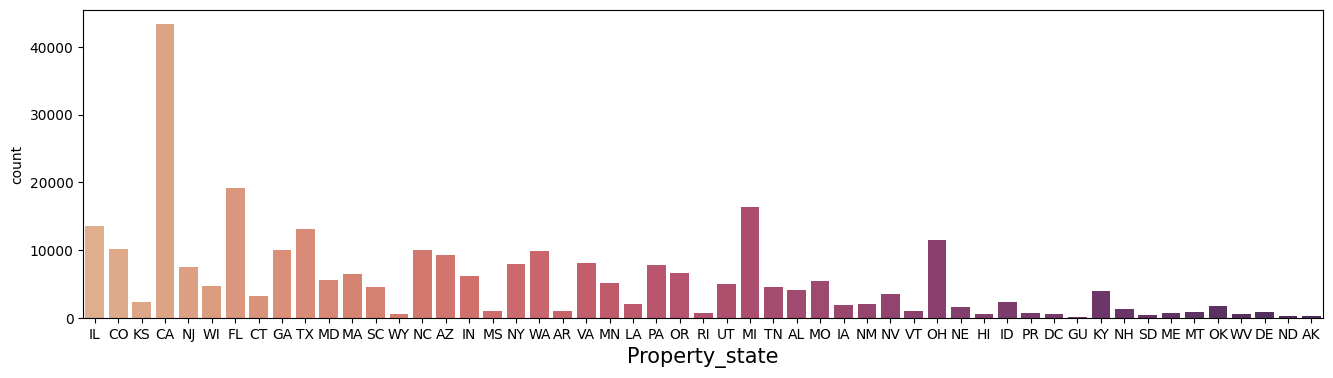

In [75]:
plt.figure(figsize=(16,4))
sns.countplot(x='PropertyState' , data=df ,palette='flare')
plt.xlabel('Property_state', fontsize=15)
plt.show()

#EDA

###univariate analysis



1. For numerical data



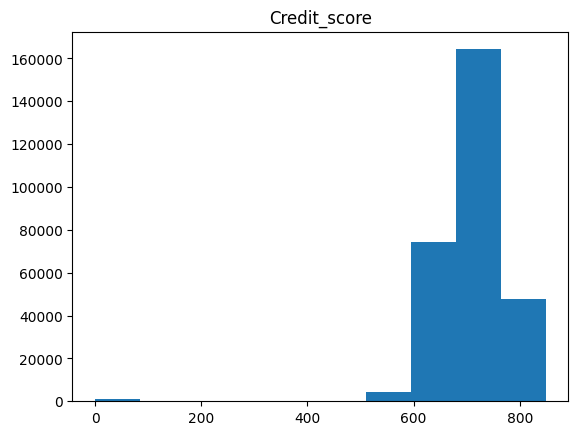

In [76]:
num = df.select_dtypes('number').columns.to_list()
BM_num =  df[num]
plt.hist(df['CreditScore'])
plt.title("Credit_score")
plt.show()

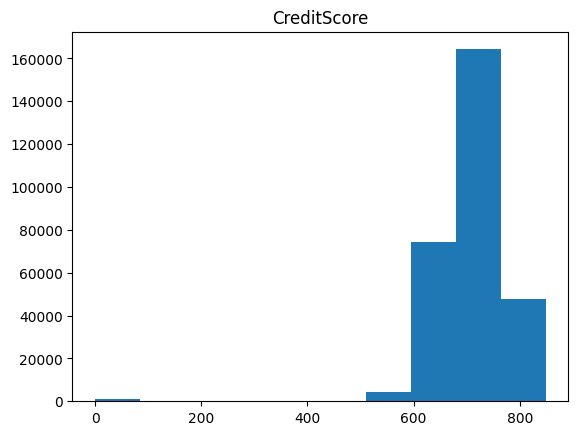

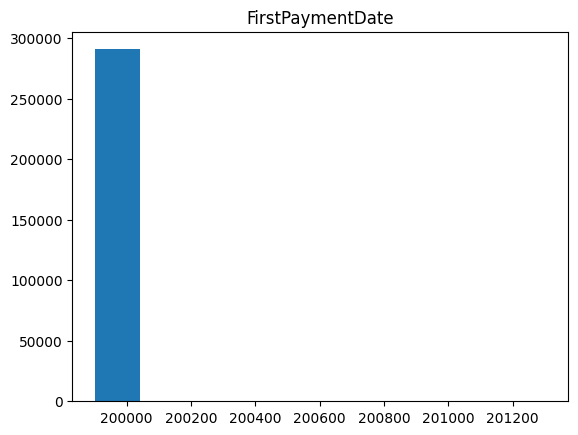

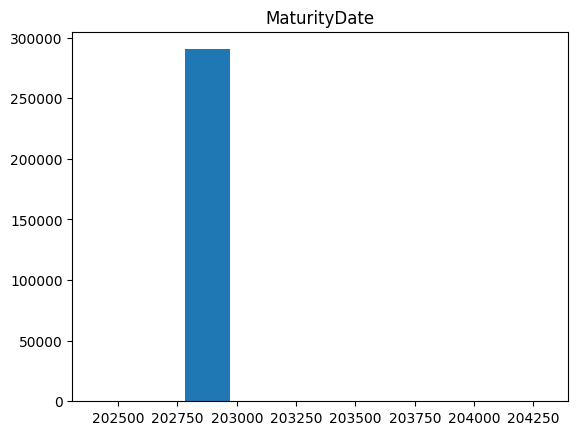

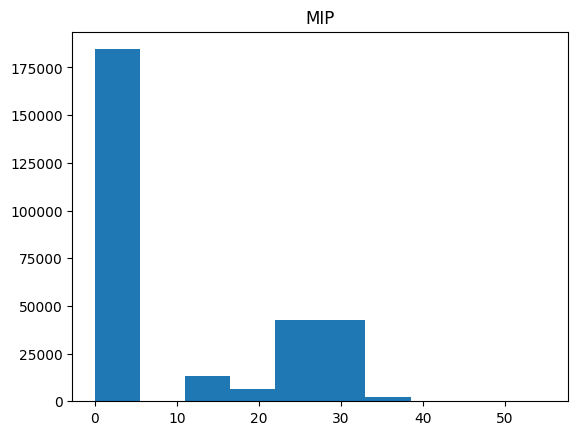

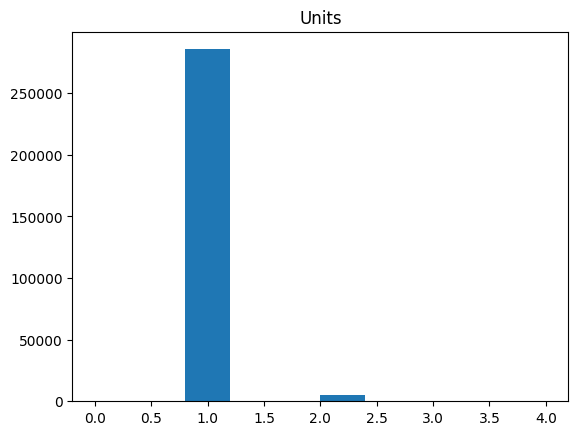

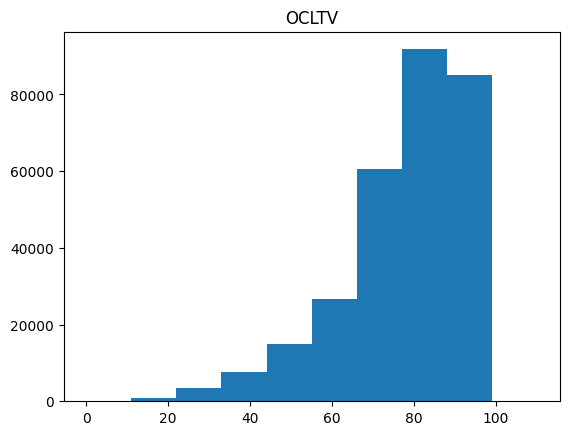

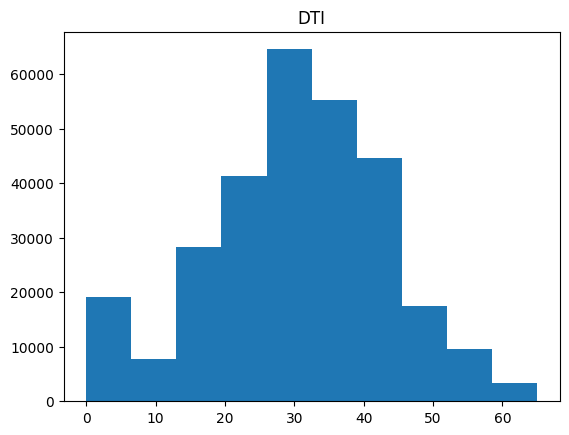

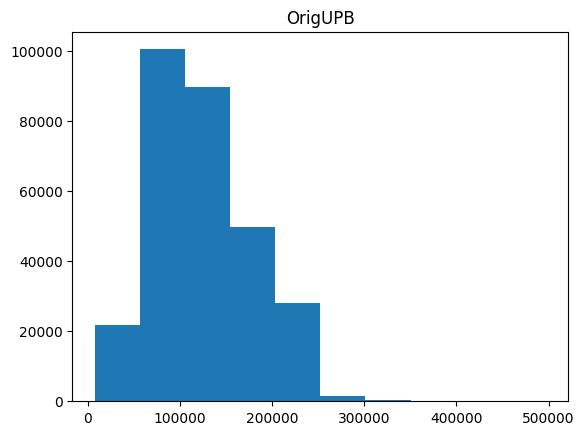

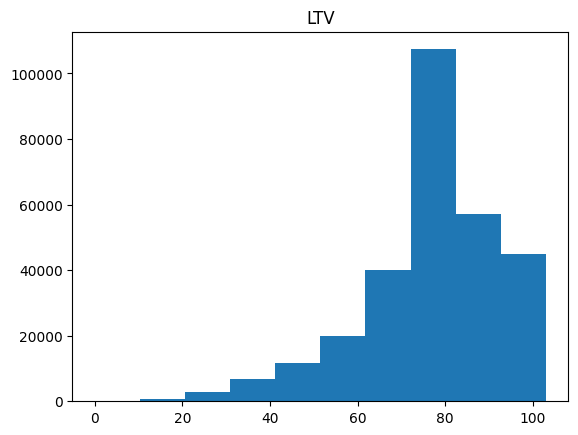

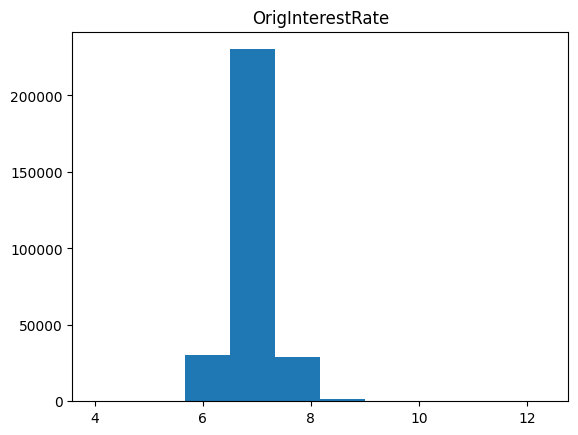

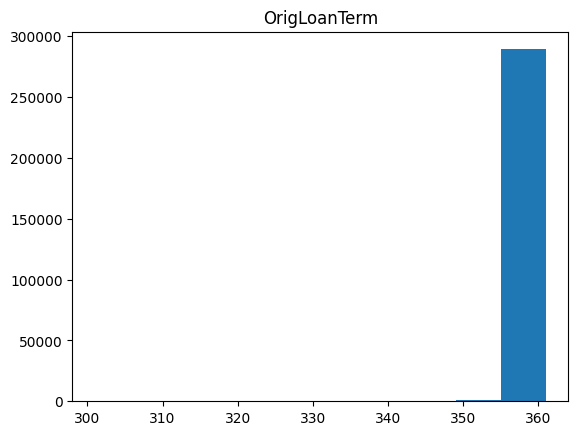

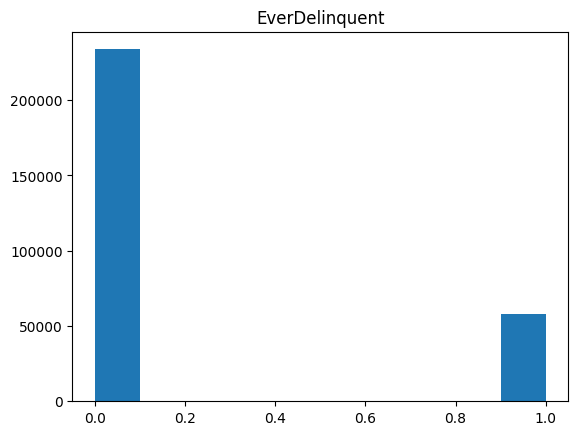

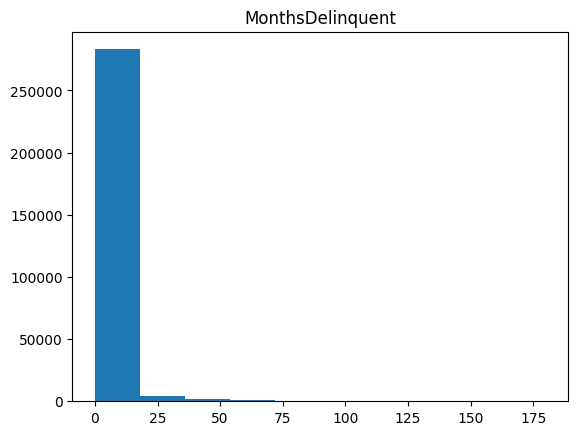

In [77]:
# using for loop to draw graphs to all numerical_data columns

for numeric in BM_num[num[:-1]]:
    plt.hist(BM_num[numeric])
    plt.title(numeric)
    plt.show()

##bivariate analysis



1. for numerical data



<Figure size 1500x1500 with 0 Axes>

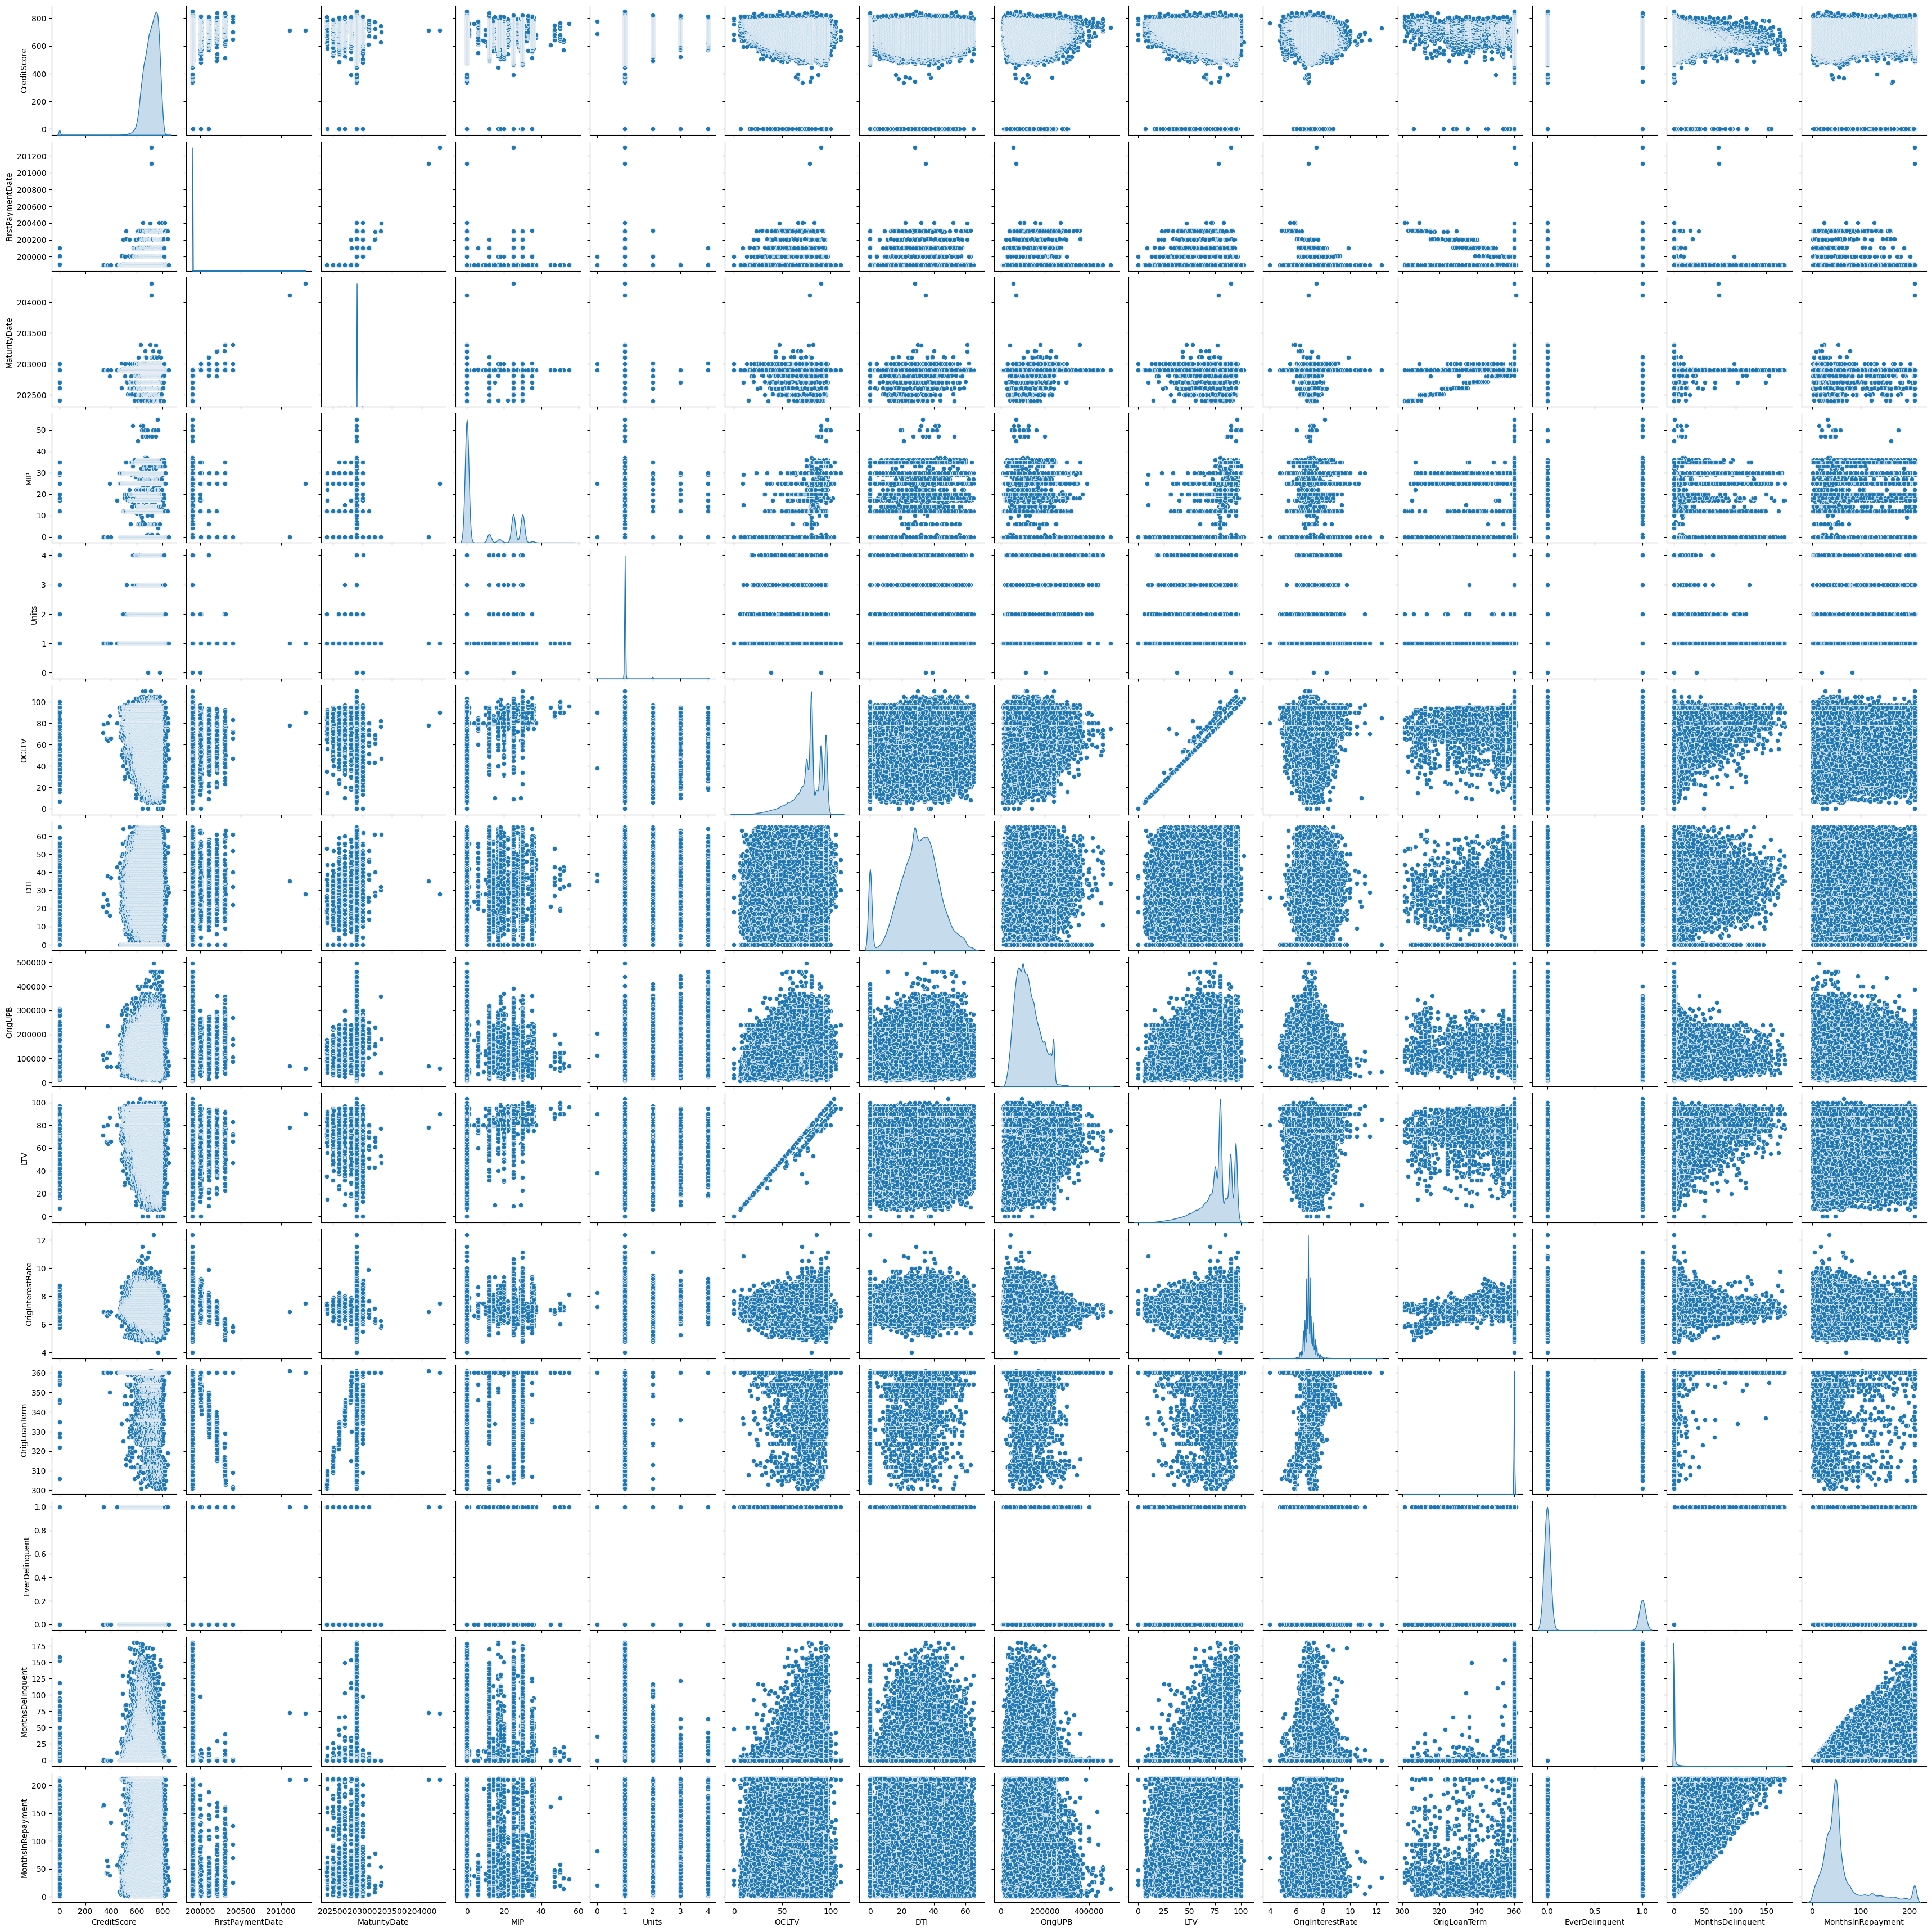

In [79]:
plt.figure(figsize=(15,15))
sns.pairplot(df,diag_kind = 'kde')

data encoding

In [81]:
encode = LabelEncoder()
list_transform = ['FirstTimeHomebuyer','Occupancy','Channel','PPM','LoanPurpose']
for i in list_transform:
    df[i] = encode.fit_transform(df[i])
df['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [82]:
df['MaturityDate'] = df['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

###Visualizing Outliers

<Axes: >

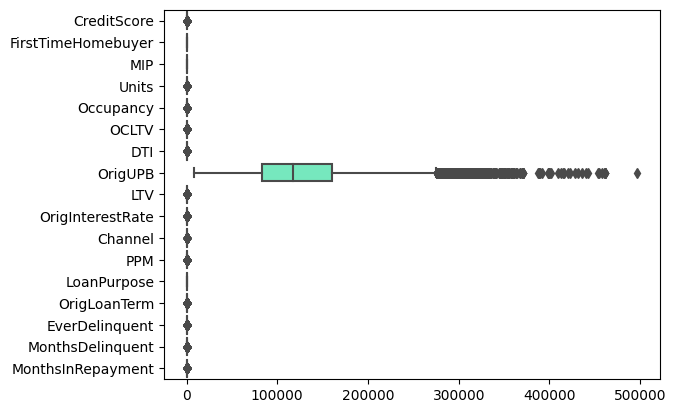

In [83]:
def boxplot(col):
  sns.boxplot(data[col])

sns.boxplot(data=df,palette='rainbow',orient='h')

In [84]:
duplicate=data.duplicated()
print(duplicate.sum())

0


correlation matrix

<ipython-input-85-1ef66550158a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


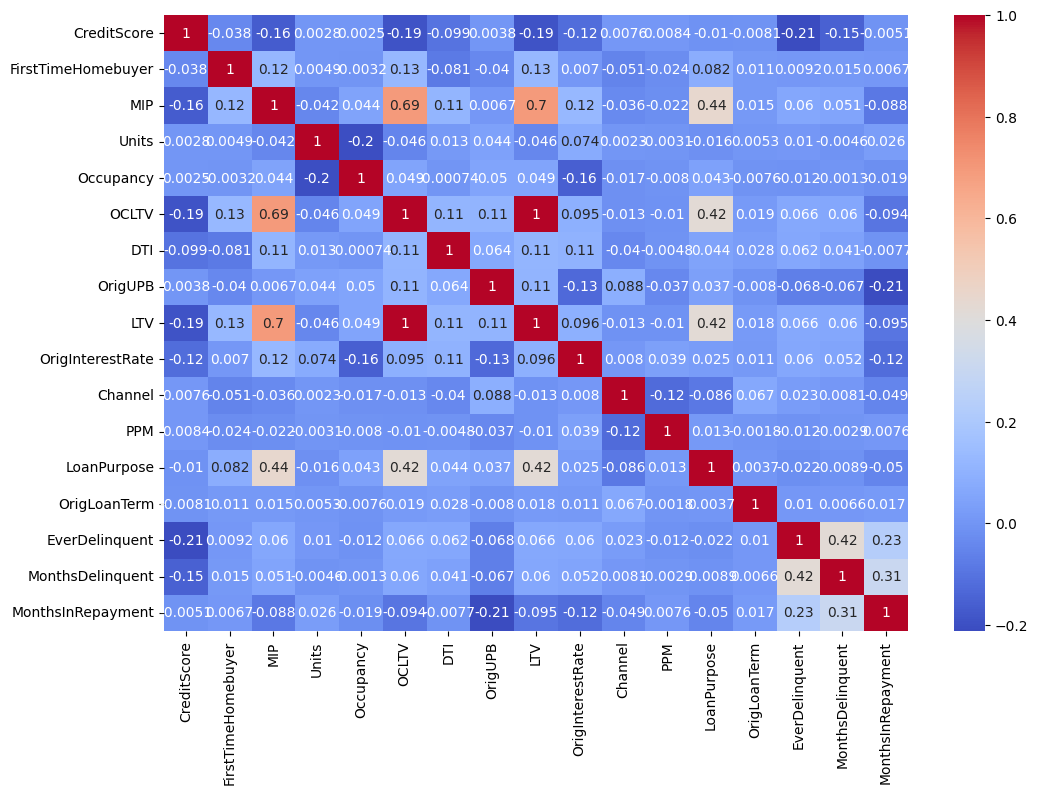

In [85]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(12,8))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()

###data labelling

In [86]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [87]:
df.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
df.drop(["FirstPaymentDate","MaturityDate"],axis=1,inplace=True) #Timestamp
x=df.drop(['EverDelinquent'], axis=1)
y=df['EverDelinquent']

In [88]:
print(x)

        CreditScore  FirstTimeHomebuyer    MSA  MIP  Units  Occupancy  OCLTV  \
0                 0                   0  16974   25      1          1     89   
1                 0                   0  19740    0      1          1     73   
2                 0                   0  29940    0      1          1     75   
3                 0                   0  31084    0      1          1     76   
4                 0                   0  35644    0      1          1     78   
...             ...                 ...    ...  ...    ...        ...    ...   
291446          839                   0  37964    0      1          1     60   
291447          840                   0  35644    0      1          1     73   
291448          840                   0  42044    0      1          1     73   
291449          845                   0  37964    0      1          0     80   
291450          849                   0  37964    0      1          1     47   

        DTI  OrigUPB  LTV  OrigInterest

In [89]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 291451, dtype: int64
